In [ ]:
!pip install pandas-datareader

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from pandas_datareader import wb

# Example indicators: economic and social
indicators = {
    'NY.GDP.PCAP.CD': 'gdp_per_capita',
    'SP.POP.TOTL': 'population',
    'SL.UEM.TOTL.ZS': 'unemployment_rate',
    'SE.XPD.TOTL.GD.ZS': 'education_exp_pct_gdp',
    'SH.XPD.CHEX.GD.ZS': 'health_exp_pct_gdp',
    'AG.LND.PRCP.MM': 'annual_precipitation'  # optional, climate
}

# Fetch data for years 2000–2020 for all countries
df = wb.download(
    indicator=list(indicators.keys()),
    country='all',
    start=2000,
    end=2020
).reset_index()

# Rename columns
df.rename(columns=indicators, inplace=True)

# Drop missing
df.dropna(inplace=True)

print(f"Shape: {df.shape}")
df.head()


### **LASSO REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

target_indicator = 'NY.GDP.PCAP.CD'

indicators = list({
    'SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'EG.USE.PCAP.KG.OE', 'SH.XPD.CHEX.GD.ZS', 'SL.TLF.CACT.FE.ZS', 'IT.NET.USER.ZS',
    'SP.POP.TOTL', 'GC.TAX.TOTL.GD.ZS', 'SL.TLF.CACT.MA.ZS', 'EG.ELC.ACCS.ZS',
    'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD', 'SP.URB.TOTL.IN.ZS', 'SE.ADT.LITR.ZS',
    'SE.XPD.TOTL.GD.ZS', 'NE.GDI.FTOT.ZS', 'FP.CPI.TOTL.ZG', 'FP.CPI.TOTL'
})

indicator_names = {
    'SP.DYN.LE00.IN': 'Life Expectancy (years)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    'EG.USE.PCAP.KG.OE': 'Energy Use per Capita',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SL.TLF.CACT.FE.ZS': 'Female Labor Participation Rate',
    'IT.NET.USER.ZS': 'Internet Users (%)',
    'SP.POP.TOTL': 'Total Population',
    'GC.TAX.TOTL.GD.ZS': 'Tax Revenue (% of GDP)',
    'SL.TLF.CACT.MA.ZS': 'Male Labor Participation Rate',
    'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (US$)',
    'SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Education Expenditure (% of GDP)',
    'NE.GDI.FTOT.ZS': 'Capital Formation (% of GDP)',
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'FP.CPI.TOTL': 'Consumer Price Index (total)'
}

all_codes = list(indicators) + [target_indicator]
df = wb.download(indicator=all_codes, country='all', start=2010, end=2019)

df = df.reset_index()
df = df.dropna(subset=[target_indicator])
df = df.dropna(thresh=int(len(indicators) * 0.7) + 3, subset=indicators)

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df[indicators])
X = pd.DataFrame(X_imputed, columns=indicators)
y = df[target_indicator].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Lasso regression with cross-validation
alphas = np.logspace(-4, 4, 100)
lasso_cv_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=5, max_iter=10000))
])

lasso_cv_pipeline.fit(X_train, y_train)

y_pred_lasso = lasso_cv_pipeline.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
alpha_lasso = lasso_cv_pipeline.named_steps['lasso'].alpha_

print("--- Lasso Regression Results ---")
print(f'Lasso selected alpha: {alpha_lasso:.5f}')
print(f'Test MSE (Lasso): {mse_lasso:.2f}')
print(f'Test R² (Lasso): {r2_lasso:.4f}')

coef_lasso = lasso_cv_pipeline.named_steps['lasso'].coef_
coef_df = pd.DataFrame({'Indicator': indicators, 'Coefficient': coef_lasso})
coef_df['Readable Indicator'] = coef_df['Indicator'].map(indicator_names)

print("\nLasso Coefficients (sorted by absolute value):")
print(coef_df[['Readable Indicator', 'Coefficient']].sort_values(
    by='Coefficient', key=abs, ascending=False
).reset_index(drop=True))


### **RIDGE REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

target_indicator = 'NY.GDP.PCAP.CD'

indicators = list({
    'SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'EG.USE.PCAP.KG.OE', 'SH.XPD.CHEX.GD.ZS', 'SL.TLF.CACT.FE.ZS', 'IT.NET.USER.ZS',
    'SP.POP.TOTL', 'GC.TAX.TOTL.GD.ZS', 'SL.TLF.CACT.MA.ZS', 'EG.ELC.ACCS.ZS',
    'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD', 'SP.URB.TOTL.IN.ZS', 'SE.ADT.LITR.ZS',
    'SE.XPD.TOTL.GD.ZS', 'NE.GDI.FTOT.ZS', 'FP.CPI.TOTL.ZG', 'FP.CPI.TOTL'
})

indicator_names = {
    'SP.DYN.LE00.IN': 'Life Expectancy (years)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    # 'NE.EXP.GNFS.ZS': 'Exports (% of GDP)',
    'EG.USE.PCAP.KG.OE': 'Energy Use per Capita',
    # 'NE.IMP.GNFS.ZS': 'Imports (% of GDP)',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SL.TLF.CACT.FE.ZS': 'Female Labor Participation Rate',
    'IT.NET.USER.ZS': 'Internet Users (%)',
    'SP.POP.TOTL': 'Total Population',
    'GC.TAX.TOTL.GD.ZS': 'Tax Revenue (% of GDP)',
    'SL.TLF.CACT.MA.ZS': 'Male Labor Participation Rate',
    'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (US$)',
    'SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Education Expenditure (% of GDP)',
    'NE.GDI.FTOT.ZS': 'Capital Formation (% of GDP)',
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'FP.CPI.TOTL': 'Consumer Price Index (total)'
}

all_codes = list(indicators) + [target_indicator]
df = wb.download(indicator=all_codes, country='all', start=2010, end=2019)

df = df.reset_index()

df = df.dropna(subset=[target_indicator])

df = df.dropna(thresh=int(len(indicators)*0.7) + 3, subset=indicators)

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df[indicators])

X = pd.DataFrame(X_imputed, columns=indicators)

y = df[target_indicator].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ridge regression with built-in CV over alpha (regularization strength)
alphas = np.logspace(-4, 4, 100)
ridge_cv_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=alphas, cv=5))
])

ridge_cv_pipeline.fit(X_train, y_train)

y_pred_ridge = ridge_cv_pipeline.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
alpha_ridge = ridge_cv_pipeline.named_steps['ridge'].alpha_

print("--- Ridge Regression Results ---")
print(f'Ridge selected alpha: {alpha_ridge:.5f}')
print(f'Test MSE (Ridge): {mse_ridge:.2f}')
print(f'Test R² (Ridge): {r2_ridge:.4f}')

coef_ridge = ridge_cv_pipeline.named_steps['ridge'].coef_
coef_df = pd.DataFrame({'Indicator': indicators, 'Coefficient': coef_ridge})
coef_df['Readable Indicator'] = coef_df['Indicator'].map(indicator_names)
print("\nRidge Coefficients (sorted by absolute value):")
print(coef_df[['Readable Indicator', 'Coefficient']].sort_values(
    by='Coefficient', key=abs, ascending=False
).reset_index(drop=True))


### **GENERATIVE ADDITIVE MODEL**

In [ ]:
import scipy.sparse

for cls in [scipy.sparse.csr_matrix, scipy.sparse.csc_matrix, scipy.sparse.coo_matrix]:
    if not hasattr(cls, 'A'):
        @property
        def _get_A(self):
            return self.toarray()
        cls.A = _get_A



import pandas as pd
import numpy as np
from pandas_datareader import wb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
import warnings

warnings.filterwarnings('ignore')

# --- Define target and predictors ---
target_indicator = 'NY.GDP.PCAP.CD'

indicators = [
    'SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'EG.USE.PCAP.KG.OE', 'SH.XPD.CHEX.GD.ZS', 'SL.TLF.CACT.FE.ZS', 'IT.NET.USER.ZS',
    'SP.POP.TOTL', 'GC.TAX.TOTL.GD.ZS', 'SL.TLF.CACT.MA.ZS', 'EG.ELC.ACCS.ZS',
    'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD', 'SP.URB.TOTL.IN.ZS', 'SE.ADT.LITR.ZS',
    'SE.XPD.TOTL.GD.ZS', 'NE.GDI.FTOT.ZS', 'FP.CPI.TOTL.ZG', 'FP.CPI.TOTL'
]

indicator_names = {
    'SP.DYN.LE00.IN': 'Life Expectancy (years)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    # 'NE.EXP.GNFS.ZS': 'Exports (% of GDP)',
    'EG.USE.PCAP.KG.OE': 'Energy Use per Capita',
    # 'NE.IMP.GNFS.ZS': 'Imports (% of GDP)',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SL.TLF.CACT.FE.ZS': 'Female Labor Participation Rate',
    'IT.NET.USER.ZS': 'Internet Users (%)',
    'SP.POP.TOTL': 'Total Population',
    'GC.TAX.TOTL.GD.ZS': 'Tax Revenue (% of GDP)',
    'SL.TLF.CACT.MA.ZS': 'Male Labor Participation Rate',
    'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (US$)',
    'SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Education Expenditure (% of GDP)',
    'NE.GDI.FTOT.ZS': 'Capital Formation (% of GDP)',
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'FP.CPI.TOTL': 'Consumer Price Index (total)'
}

# --- Download and prepare data ---
print("Downloading data from World Bank...")
all_codes = indicators + [target_indicator]
df = wb.download(indicator=all_codes, country='all', start=2010, end=2019).reset_index()

print("Cleaning and preprocessing data...")
df = df.dropna(subset=[target_indicator])
df = df.dropna(thresh=int(len(indicators) * 0.7) + 3, subset=indicators)

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df[indicators])
X = pd.DataFrame(X_imputed, columns=indicators)
y = df[target_indicator].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- DEBUG INFO ---")
print("X_train_scaled type:", type(X_train_scaled))
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("Is dense:", isinstance(X_train_scaled, np.ndarray))

# --- Define and fit GAM model ---
from functools import reduce
from operator import add

print("\n--- Generative Additive Model (GAM) Analysis ---")

gam = LinearGAM(reduce(add, [s(i) for i in range(len(indicators))]))

import numpy as np
from scipy.sparse import issparse

if issparse(X_train_scaled):
    print("Converting X_train_scaled from sparse to dense...")
    X_train_scaled = X_train_scaled.toarray()
else:
    print("X_train_scaled is already dense.")


print("Fitting GAM model...")
gam.fit(X_train_scaled, y_train)
print("GAM model fitted.")

# --- Predict and evaluate ---
y_pred = gam.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest MSE: {mse:.2f}")
print(f"Test R²: {r2:.4f}")

# --- Plot Partial Dependence ---
print("\nGenerating Partial Dependence Plots...")

ncols = 4
nrows = int(np.ceil(len(indicators) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

for i, feature_name in enumerate(indicators):
    if i < len(axes):
        XX = gam.generate_X_grid(term=i, n=100)
        pdp = gam.partial_dependence(term=i, X=XX)
        pdp_ci = gam.partial_dependence(term=i, X=XX, width=0.95)[1]

        original_values = scaler.inverse_transform(XX)[:, i]

        axes[i].plot(original_values, pdp, color='blue')
        axes[i].plot(original_values, pdp_ci, color='red', linestyle='--')
        axes[i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
        axes[i].set_title(f'Partial Dep. of {indicator_names.get(feature_name, feature_name)}')
        axes[i].set_xlabel(f'{indicator_names.get(feature_name, feature_name)} (Original Scale)')
        axes[i].set_ylabel('Effect on Target')
        axes[i].grid(True)

# Remove extra empty subplots
for j in range(len(indicators), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("\n✅ GAM analysis complete. Review the performance metrics and plots.")


## **REGRESSION TREE**

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

target_indicator = 'NY.GDP.PCAP.CD'

indicators = list({
    'SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'EG.USE.PCAP.KG.OE', 'SH.XPD.CHEX.GD.ZS', 'SL.TLF.CACT.FE.ZS', 'IT.NET.USER.ZS',
    'SP.POP.TOTL', 'GC.TAX.TOTL.GD.ZS', 'SL.TLF.CACT.MA.ZS', 'EG.ELC.ACCS.ZS',
    'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD', 'SP.URB.TOTL.IN.ZS', 'SE.ADT.LITR.ZS',
    'SE.XPD.TOTL.GD.ZS', 'NE.GDI.FTOT.ZS', 'FP.CPI.TOTL.ZG', 'FP.CPI.TOTL'
})

indicator_names = {
    'SP.DYN.LE00.IN': 'Life Expectancy (years)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    'EG.USE.PCAP.KG.OE': 'Energy Use per Capita',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SL.TLF.CACT.FE.ZS': 'Female Labor Participation Rate',
    'IT.NET.USER.ZS': 'Internet Users (%)',
    'SP.POP.TOTL': 'Total Population',
    'GC.TAX.TOTL.GD.ZS': 'Tax Revenue (% of GDP)',
    'SL.TLF.CACT.MA.ZS': 'Male Labor Participation Rate',
    'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (US$)',
    'SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Education Expenditure (% of GDP)',
    'NE.GDI.FTOT.ZS': 'Capital Formation (% of GDP)',
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'FP.CPI.TOTL': 'Consumer Price Index (total)'
}

all_codes = list(indicators) + [target_indicator]
df = wb.download(indicator=all_codes, country='all', start=2010, end=2019)

df = df.reset_index()
df = df.dropna(subset=[target_indicator])
df = df.dropna(thresh=int(len(indicators) * 0.7) + 3, subset=indicators)

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df[indicators])
X = pd.DataFrame(X_imputed, columns=indicators)
y = df[target_indicator].values # Define y here to make the code self-contained

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree with basic hyperparameter tuning, now within a pipeline for scaling
# The pipeline ensures imputation, scaling, and tree fitting are done in sequence
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Add StandardScaler here
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Update param_grid to reflect the pipeline steps
param_grid = {
    'tree__max_depth': [3, 5, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
y_pred_tree = best_pipeline.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("--- Decision Tree Regression Results ---")
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Test MSE (Tree): {mse_tree:.2f}')
print(f'Test R² (Tree): {r2_tree:.4f}')

# Get feature importances from the best tree estimator within the pipeline
# The feature importances are still calculated on the unscaled feature space
# because the splits are inherently on the unscaled values.
importances = best_pipeline.named_steps['tree'].feature_importances_
importance_df = pd.DataFrame({
    'Indicator': indicators,
    'Readable Indicator': [indicator_names[i] for i in indicators],
    'Importance (%)': 100 * importances / importances.sum()
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False).reset_index(drop=True)

# Display
print("\nFeature Importances (as percentages):")
print(importance_df[['Readable Indicator', 'Importance (%)']])


## **POLYNOMIAL REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings

warnings.filterwarnings('ignore')

# -------------------------------
# Indicators Setup
# -------------------------------
target_indicator = 'NY.GDP.PCAP.CD'

indicators = list({
    'SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'EG.USE.PCAP.KG.OE', 'SH.XPD.CHEX.GD.ZS', 'SL.TLF.CACT.FE.ZS', 'IT.NET.USER.ZS',
    'SP.POP.TOTL', 'GC.TAX.TOTL.GD.ZS', 'SL.TLF.CACT.MA.ZS', 'EG.ELC.ACCS.ZS',
    'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD', 'SP.URB.TOTL.IN.ZS', 'SE.ADT.LITR.ZS',
    'SE.XPD.TOTL.GD.ZS', 'NE.GDI.FTOT.ZS', 'FP.CPI.TOTL.ZG', 'FP.CPI.TOTL'
})

indicator_names = {
    'SP.DYN.LE00.IN': 'Life Expectancy (years)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    'EG.USE.PCAP.KG.OE': 'Energy Use per Capita',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SL.TLF.CACT.FE.ZS': 'Female Labor Participation Rate',
    'IT.NET.USER.ZS': 'Internet Users (%)',
    'SP.POP.TOTL': 'Total Population',
    'GC.TAX.TOTL.GD.ZS': 'Tax Revenue (% of GDP)',
    'SL.TLF.CACT.MA.ZS': 'Male Labor Participation Rate',
    'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (US$)',
    'SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Education Expenditure (% of GDP)',
    'NE.GDI.FTOT.ZS': 'Capital Formation (% of GDP)',
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'FP.CPI.TOTL': 'Consumer Price Index (total)'
}

# -------------------------------
# Data Download and Preprocessing
# -------------------------------
all_codes = list(indicators) + [target_indicator]
df = wb.download(indicator=all_codes, country='all', start=2010, end=2019)

df = df.reset_index()
df = df.dropna(subset=[target_indicator])
df = df.dropna(thresh=int(len(indicators) * 0.7) + 3, subset=indicators)

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df[indicators])
X = pd.DataFrame(X_imputed, columns=indicators)
y = df[target_indicator].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Polynomial Lasso Pipeline (degree=2)
# -------------------------------
alphas = np.logspace(-4, 4, 100)
poly_lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=5, max_iter=10000))
])

poly_lasso_pipeline.fit(X_train, y_train)

# -------------------------------
# Model Evaluation
# -------------------------------
y_pred_poly_lasso = poly_lasso_pipeline.predict(X_test)

mse_poly_lasso = mean_squared_error(y_test, y_pred_poly_lasso)
r2_poly_lasso = r2_score(y_test, y_pred_poly_lasso)
alpha_poly_lasso = poly_lasso_pipeline.named_steps['lasso'].alpha_

print("--- Polynomial Lasso Regression Results (degree 2) ---")
print(f'Lasso selected alpha: {alpha_poly_lasso:.5f}')
print(f'Test MSE (Polynomial Lasso): {mse_poly_lasso:.2f}')
print(f'Test R² (Polynomial Lasso): {r2_poly_lasso:.4f}')

# -------------------------------
# Feature Importance with Readable Names
# -------------------------------
feature_names = poly_lasso_pipeline.named_steps['poly'].get_feature_names_out(indicators)
coef_poly_lasso = poly_lasso_pipeline.named_steps['lasso'].coef_

coef_df_poly = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef_poly_lasso})

def prettify_feature(name):
    if '^2' in name:
        base = name.replace('^2', '')
        return f"{indicator_names.get(base, base)}²"
    elif ' ' in name:
        f1, f2 = name.split()
        return f"{indicator_names.get(f1, f1)} × {indicator_names.get(f2, f2)}"
    else:
        return indicator_names.get(name, name)

coef_df_poly['Readable Feature'] = coef_df_poly['Feature'].apply(prettify_feature)

# Sort by absolute coefficient value
coef_df_poly_sorted = coef_df_poly.sort_values(by='Coefficient', key=abs, ascending=False).reset_index(drop=True)

pd.set_option("display.max_rows", None)

non_zero_coef_df = coef_df_poly_sorted[coef_df_poly_sorted['Coefficient'] != 0]

print("\nAll polynomial features (degree 2) sorted by absolute importance:")
print(coef_df_poly_sorted[['Readable Feature', 'Coefficient']])


### **BAGGING AND BOOSTING**

In [ ]:
pip install xgboost pandas_datareader scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')

# --- World Bank Indicators ---
target_indicator = 'NY.GDP.PCAP.CD'
indicators = [
    'SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'EG.USE.PCAP.KG.OE', 'SH.XPD.CHEX.GD.ZS',
    'SL.TLF.CACT.FE.ZS', 'IT.NET.USER.ZS', 'SP.POP.TOTL', 'GC.TAX.TOTL.GD.ZS',
    'SL.TLF.CACT.MA.ZS', 'EG.ELC.ACCS.ZS', 'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD',
    'SP.URB.TOTL.IN.ZS', 'SE.ADT.LITR.ZS', 'SE.XPD.TOTL.GD.ZS', 'NE.GDI.FTOT.ZS',
    'FP.CPI.TOTL.ZG', 'FP.CPI.TOTL'
]

indicator_names = {
    'SP.DYN.LE00.IN': 'Life Expectancy (years)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    'EG.USE.PCAP.KG.OE': 'Energy Use per Capita',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SL.TLF.CACT.FE.ZS': 'Female Labor Participation Rate',
    'IT.NET.USER.ZS': 'Internet Users (%)',
    'SP.POP.TOTL': 'Total Population',
    'GC.TAX.TOTL.GD.ZS': 'Tax Revenue (% of GDP)',
    'SL.TLF.CACT.MA.ZS': 'Male Labor Participation Rate',
    'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (US$)',
    'SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Education Expenditure (% of GDP)',
    'NE.GDI.FTOT.ZS': 'Capital Formation (% of GDP)',
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'FP.CPI.TOTL': 'Consumer Price Index (total)'
}

# --- Data Fetching ---
all_codes = indicators + [target_indicator]
df = wb.download(indicator=all_codes, country='all', start=2010, end=2019).reset_index()
df = df.dropna(subset=[target_indicator])
df = df.dropna(thresh=int(len(indicators) * 0.7) + 3, subset=indicators)

# --- Imputation ---
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df[indicators])
X = pd.DataFrame(X_imputed, columns=indicators)
y = df[target_indicator].values

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================
# 🔁 Random Forest Regressor
# ==========================
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\n--- Random Forest Regressor Results ---")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_rf):.4f}")

# ==========================
# 🚀 XGBoost Regressor
# ==========================
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbosity=0))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

print("\n--- XGBoost Regressor Results ---")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_xgb):.4f}")



--- Random Forest Regressor Results ---
Test MSE: 10635719.04
Test R²: 0.9594

--- XGBoost Regressor Results ---
Test MSE: 10921149.35
Test R²: 0.9583


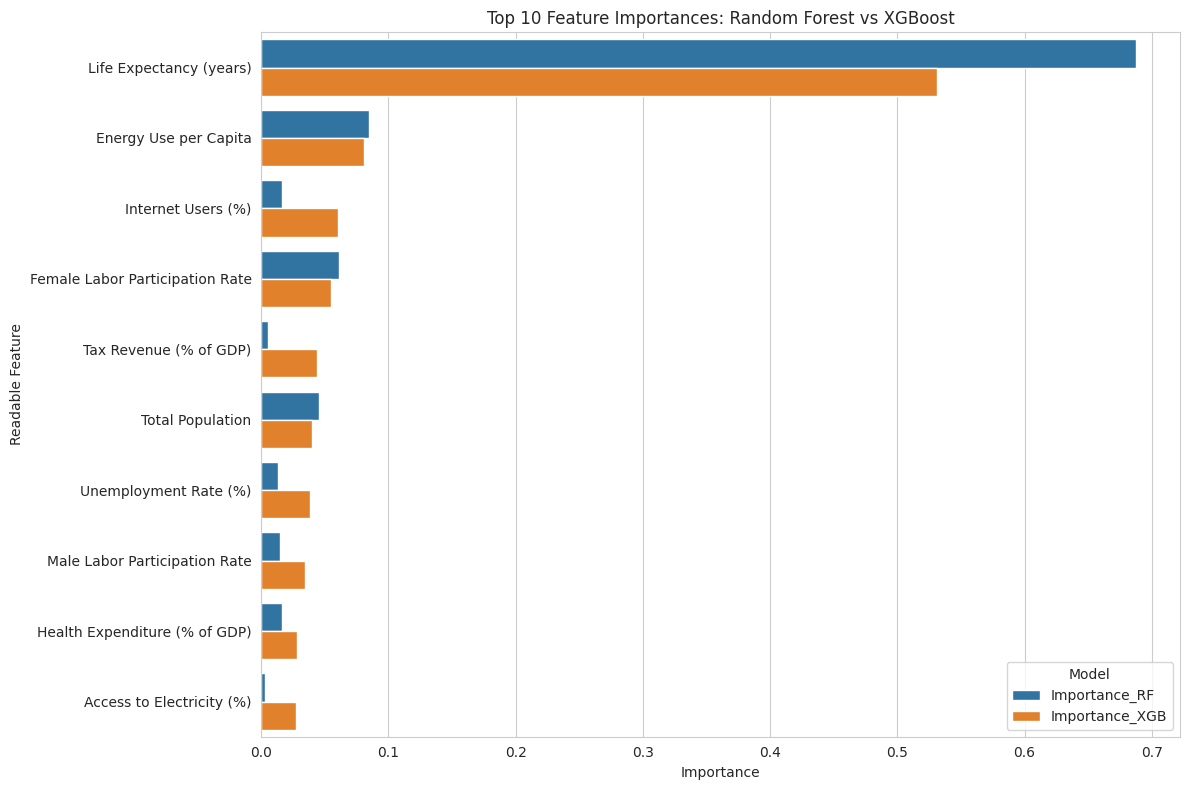


--- Feature Importances Comparison ---
                    Readable Feature  Importance_RF  Importance_XGB
0            Life Expectancy (years)       0.687793        0.531449
1              Energy Use per Capita       0.085019        0.080882
2                 Internet Users (%)       0.016053        0.060057
3    Female Labor Participation Rate       0.060872        0.054931
4             Tax Revenue (% of GDP)       0.005631        0.043707
5                   Total Population       0.045406        0.039583
6              Unemployment Rate (%)       0.012774        0.038041
7      Male Labor Participation Rate       0.014535        0.034493
8      Health Expenditure (% of GDP)       0.016630        0.028472
9          Access to Electricity (%)       0.002701        0.027282
10              Urban Population (%)       0.018968        0.019594
11             Infant Mortality Rate       0.011001        0.018194
12      Consumer Price Index (total)       0.004867        0.010036
13      

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Extract Feature Importances ===

# Random Forest
rf_model = rf_pipeline.named_steps['rf']
rf_importances = rf_model.feature_importances_

rf_df = pd.DataFrame({
    'Feature': indicators,
    'Importance_RF': rf_importances
}).sort_values(by='Importance_RF', ascending=False)

# XGBoost
xgb_model = xgb_pipeline.named_steps['xgb']
xgb_importances = xgb_model.feature_importances_

xgb_df = pd.DataFrame({
    'Feature': indicators,
    'Importance_XGB': xgb_importances
}).sort_values(by='Importance_XGB', ascending=False)

# === Merge for Side-by-Side Comparison ===
combined_df = pd.merge(rf_df, xgb_df, on='Feature')
combined_df['Readable Feature'] = combined_df['Feature'].map(indicator_names)

# === Plot Side-by-Side Importances ===
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

top_features = combined_df.sort_values(by='Importance_XGB', ascending=False).head(10)

# Barplot for Top 10 features by XGBoost
top_features_melted = top_features.melt(
    id_vars='Readable Feature',
    value_vars=['Importance_RF', 'Importance_XGB'],
    var_name='Model',
    value_name='Importance'
)

sns.barplot(
    data=top_features_melted,
    y='Readable Feature',
    x='Importance',
    hue='Model'
)
plt.title("Top 10 Feature Importances: Random Forest vs XGBoost")
plt.tight_layout()
plt.show()

# === Print Full Sorted Table ===
print("\n--- Feature Importances Comparison ---")
print(combined_df[['Readable Feature', 'Importance_RF', 'Importance_XGB']]
      .sort_values(by='Importance_XGB', ascending=False)
      .reset_index(drop=True))


## **K-MEANS CLUSTERING**

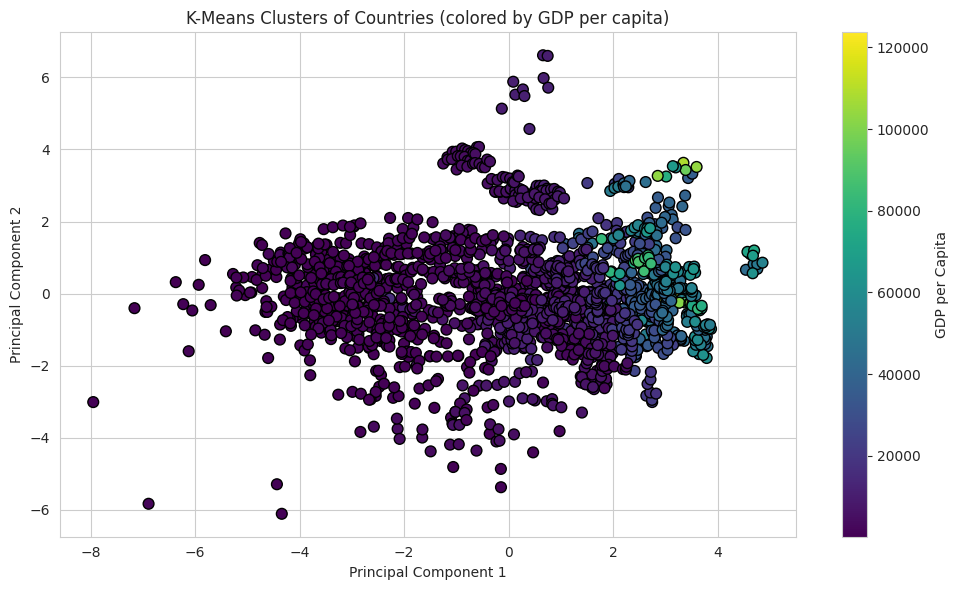



📊 Median Indicator Values per Cluster (Readable Names):


,Access to Electricity (%),Capital Formation (% of GDP),Consumer Price Index (total),Education Expenditure (% of GDP),Energy Use per Capita,FDI Net Inflows (US$),Female Labor Participation Rate,Health Expenditure (% of GDP),Infant Mortality Rate,Inflation (annual %),Internet Users (%),Life Expectancy (years),Literacy Rate (%),Male Labor Participation Rate,Tax Revenue (% of GDP),Total Population,Unemployment Rate (%),Urban Population (%)
Cluster,,,,,,,,,,,,,,,,,,
0,39.1,22.64,118.34,3.25,394.54,7.178653e+08,60.49,4.54,51.70,5.01,9.00,61.04,62.14,75.34,11.55,20747641.0,4.53,34.86
1,100.0,21.10,108.64,4.92,3234.76,7.207000e+09,52.35,8.40,4.60,1.74,77.15,79.86,97.00,68.34,18.77,8935095.0,7.42,79.10
2,96.6,25.35,117.76,4.02,1142.14,2.521362e+09,47.80,5.14,17.46,3.53,39.70,71.99,91.99,74.56,13.85,20102781.5,6.20,54.34



💰 Average GDP per Capita by Cluster:
Cluster
0     1517.16
1    31759.11
2     6062.13


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare the feature matrix ---
X_kmeans = df[indicators].copy()

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_kmeans)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- Step 2: Apply KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# --- Step 3: Apply PCA for 2D visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# --- Step 4: Plot PCA-colored by GDP ---
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['PCA1'], df['PCA2'],
    c=df['NY.GDP.PCAP.CD'], cmap='viridis', s=60, edgecolors='k'
)
cbar = plt.colorbar(scatter)
cbar.set_label('GDP per Capita')
plt.title('K-Means Clusters of Countries (colored by GDP per capita)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 5: Define readable indicator names ---
indicator_names = {
    'SP.DYN.LE00.IN': 'Life Expectancy (years)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    'EG.USE.PCAP.KG.OE': 'Energy Use per Capita',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SL.TLF.CACT.FE.ZS': 'Female Labor Participation Rate',
    'IT.NET.USER.ZS': 'Internet Users (%)',
    'SP.POP.TOTL': 'Total Population',
    'GC.TAX.TOTL.GD.ZS': 'Tax Revenue (% of GDP)',
    'SL.TLF.CACT.MA.ZS': 'Male Labor Participation Rate',
    'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (US$)',
    'SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Education Expenditure (% of GDP)',
    'NE.GDI.FTOT.ZS': 'Capital Formation (% of GDP)',
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'FP.CPI.TOTL': 'Consumer Price Index (total)'
}

# --- Step 6: Cluster-level Indicator Summary ---
cluster_profiles = df.groupby('Cluster')[indicators].median()
readable_cluster_profiles = cluster_profiles.rename(columns=indicator_names)
readable_cluster_profiles = readable_cluster_profiles[sorted(readable_cluster_profiles.columns)]

# Display as a formatted table
print("\n\n📊 Median Indicator Values per Cluster (Readable Names):")
display(readable_cluster_profiles.round(2))  # if using Jupyter, else use print()

# --- Step 7: GDP per Capita per Cluster ---
gdp_by_cluster = df.groupby('Cluster')['NY.GDP.PCAP.CD'].mean().round(2)

print("\n💰 Average GDP per Capita by Cluster:")
print(gdp_by_cluster.to_string())


### **SUPPORT VECTOR MACHINE**

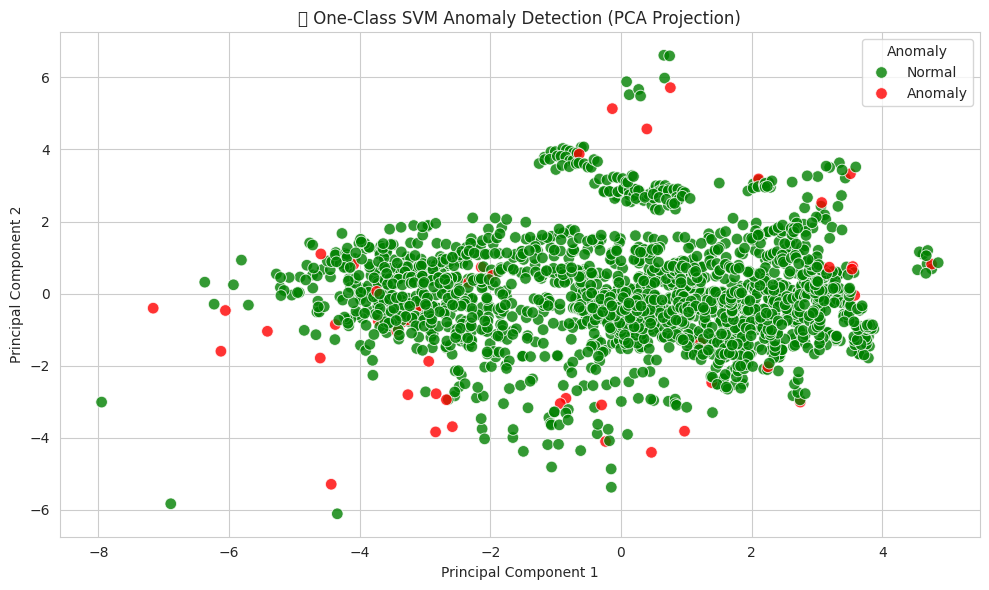


 High-Income Anomalous Countries (GDP > $20,000):
      country year  GDP_per_Capita
      Iceland 2013    49804.982998
United States 2010    48642.631209
      Bahrain 2018    26324.406655
       Greece 2013    21573.344976

 Low-Income Anomalous Countries (GDP < $2,000):
                 country year  GDP_per_Capita
                 Burundi 2010      216.727705
Central African Republic 2019      449.228468
                  Malawi 2018      533.203174
             Afghanistan 2015      565.569730
             Gambia, The 2013      653.862713
                  Guinea 2010      659.235326
                   Sudan 2018      731.027466
                Ethiopia 2017      745.632434
            Sierra Leone 2019      844.049555
                    Chad 2016      861.831768
                Pakistan 2010      987.304571
   Sao Tome and Principe 2012     1210.792647
                 Lesotho 2012     1217.930712
             South Sudan 2014     1242.734502
         Solomon Islands 2010     1

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Impute and scale the data ---
X_ocsvm = df[indicators].copy()

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_ocsvm)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- Step 2: Fit One-Class SVM ---
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)
ocsvm.fit(X_scaled)

# --- Step 3: Predict anomalies ---
df['Anomaly'] = ocsvm.predict(X_scaled).astype(int)
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# --- Step 4: PCA for 2D visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# --- Step 5: Plot anomalies ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='PCA1', y='PCA2',
    hue='Anomaly', palette={'Normal': 'green', 'Anomaly': 'red'},
    s=70, alpha=0.8
)
plt.title('📌 One-Class SVM Anomaly Detection (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 6: Rename columns to readable indicator names ---
indicator_names = {
    'SP.DYN.LE00.IN': 'Life Expectancy (years)',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    'EG.USE.PCAP.KG.OE': 'Energy Use per Capita',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% of GDP)',
    'SL.TLF.CACT.FE.ZS': 'Female Labor Participation Rate',
    'IT.NET.USER.ZS': 'Internet Users (%)',
    'SP.POP.TOTL': 'Total Population',
    'GC.TAX.TOTL.GD.ZS': 'Tax Revenue (% of GDP)',
    'SL.TLF.CACT.MA.ZS': 'Male Labor Participation Rate',
    'EG.ELC.ACCS.ZS': 'Access to Electricity (%)',
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)',
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (US$)',
    'SP.URB.TOTL.IN.ZS': 'Urban Population (%)',
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Education Expenditure (% of GDP)',
    'NE.GDI.FTOT.ZS': 'Capital Formation (% of GDP)',
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'FP.CPI.TOTL': 'Consumer Price Index (total)'
}

# --- Step 1: Filter and prepare anomaly DataFrame ---
cols_to_show = ['country', 'year', 'NY.GDP.PCAP.CD'] + indicators
anomaly_df = df[df['Anomaly'] == 'Anomaly'][cols_to_show].copy()

# --- Remove non-country aggregates ---
remove_list = [
    'Post-demographic dividend',
    'High income',
    'Low & middle income',
    'North America',
    'World'
]

# Filter them out
anomaly_df = anomaly_df[~anomaly_df['country'].isin(remove_list)]

# --- Step 2: Rename columns ---
anomaly_df.rename(columns=indicator_names, inplace=True)
anomaly_df.rename(columns={'NY.GDP.PCAP.CD': 'GDP_per_Capita'}, inplace=True)

# --- Step 3: Keep only worst GDP year per country ---
anomaly_df.sort_values(by='GDP_per_Capita', inplace=True)
anomaly_df.drop_duplicates(subset='country', keep='first', inplace=True)

# --- Step 4: Split into high-income and low-income anomaly groups ---
high_income_anomalies = anomaly_df[anomaly_df['GDP_per_Capita'] > 20000]
low_income_anomalies = anomaly_df[anomaly_df['GDP_per_Capita'] < 2000]

# --- Step 5: Sort for display ---
high_income_anomalies = high_income_anomalies.sort_values(by='GDP_per_Capita', ascending=False).reset_index(drop=True)
low_income_anomalies = low_income_anomalies.sort_values(by='GDP_per_Capita').reset_index(drop=True)

# --- Step 6: Display tables ---
print("\n High-Income Anomalous Countries (GDP > $20,000):")
print(high_income_anomalies[['country', 'year', 'GDP_per_Capita']].to_string(index=False))

print("\n Low-Income Anomalous Countries (GDP < $2,000):")
print(low_income_anomalies[['country', 'year', 'GDP_per_Capita']].to_string(index=False))


